In [ ]:
#Importing neccessry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Load the dataset
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
# Display the first 5 rows of the dataset
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
# 1. Exploratory Data Analysis (EDA)
#  statistics summary of the data
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
# Check for missing values
data.isnull().sum()

#There is no missing values in the data

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


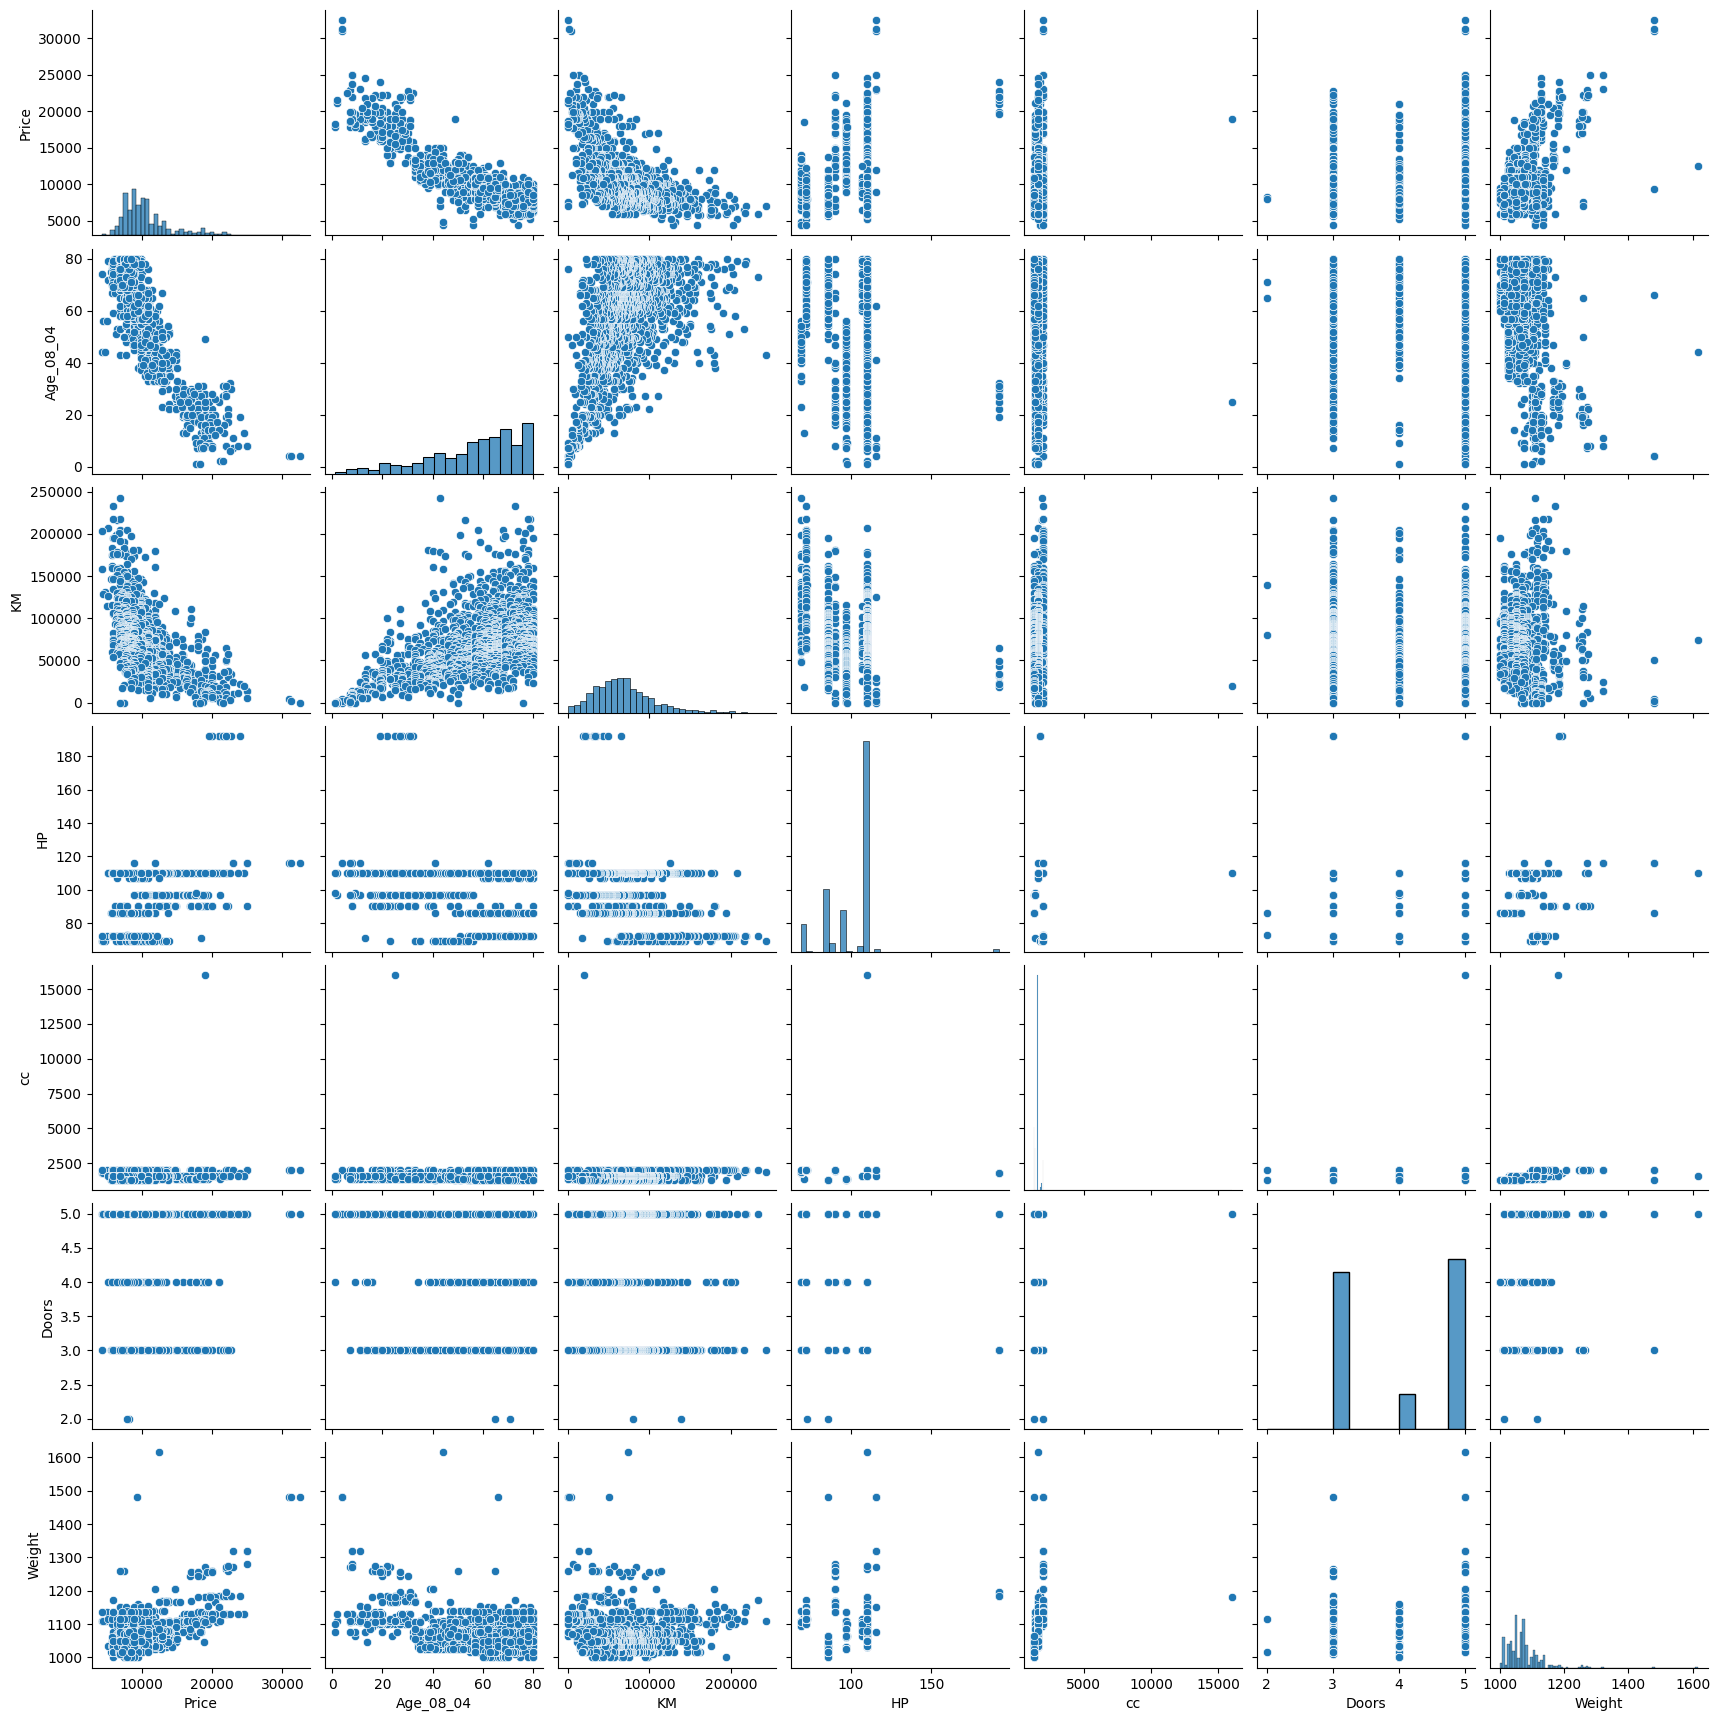

In [ ]:
# Visualizations
# Pairplot for numerical variables
sns.pairplot(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])
plt.show()

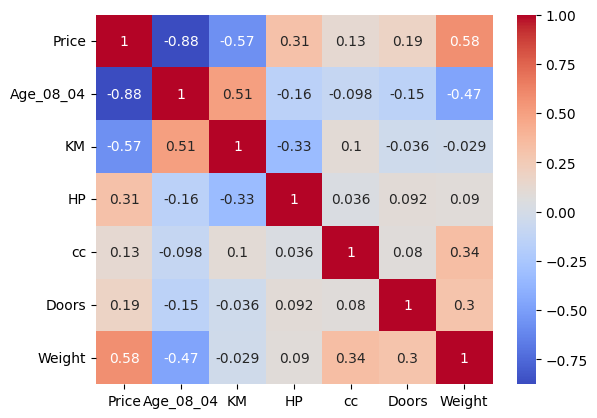

In [ ]:
# Correlation heatmap
corr_matrix = data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


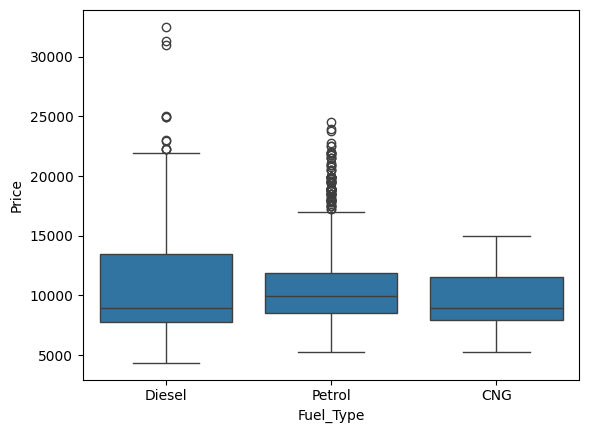

In [ ]:
# Boxplot for categorical variable (Fuel_Type)
sns.boxplot(x='Fuel_Type', y='Price', data=data)
plt.show()

In [ ]:
# 2. Data Preprocessing
# Separate features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
X

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [ ]:
# One-hot encoding for categorical variable (Fuel_Type)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Fuel_Type'])], remainder='passthrough')
X = ct.fit_transform(X)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 3. Build Multiple Linear Regression Models
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
# Model 2: Using selected features (Age, KM, HP, Weight)
model2 = LinearRegression()
model2.fit(X_train[:, [0, 1, 2, 6]], y_train)
y_pred2 = model2.predict(X_test[:, [0, 1, 2, 6]])


In [ ]:
# Model 3: Using selected features (Age, KM, HP, cc, Weight)
model3 = LinearRegression()
model3.fit(X_train[:, [0, 1, 2, 4, 6]], y_train)
y_pred3 = model3.predict(X_test[:, [0, 1, 2, 4, 6]])

In [ ]:
# 4. Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - MSE: {mse}, R2: {r2}')

evaluate_model(y_test, y_pred1, 'Model 1')
evaluate_model(y_test, y_pred2, 'Model 2')
evaluate_model(y_test, y_pred3, 'Model 3')


Model 1 - MSE: 2203043.8231437057, R2: 0.834888804061108
Model 2 - MSE: 13273775.067505492, R2: 0.0051723651632887835
Model 3 - MSE: 7614809.99577524, R2: 0.4292939740727685


In [ ]:
# 5. Apply Lasso and Ridge Regression
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')

Lasso Regression - MSE: 2202767.1490164455, R2: 0.834909539915546


In [ ]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')

Ridge Regression - MSE: 2202807.107005145, R2: 0.8349065451901428


In [ ]:
#Interview questions
#1.What is Normalization & Standardization and how is it helpful?

#Normalization:
#1.Normalization typically refers to scaling data to a specific range, often between 0 and 1. This is done by subtracting the minimum value of the feature and then dividing by the range (the difference between the maximum and minimum values).
#2.Normalization method is best in which data is not normally distributed.
#Formula:   Xnorm = (X-Xmin)/(Xmax-Xmin)
#X= Original value
#Xmax= Maximum value in the column
#Xmin= Minimum value in the column

#Standardization:
#1.Standardization, on the other hand, transforms data to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and then dividing by the standard deviation.
#2.This method is suitable for data which has normally distributed.
#Formula:  Xstand = (X-μ)/σ
#Where μ is the mean and σ is the standard distribution.

#Both techniques improve model performance and prevent bias due to different feature scales.



#2.What techniques can be used to address multicollinearity in multiple linear regression?
#Multicollinearity in multiple linear regression occurs when two or more predictor variables are highly correlated, leading to unreliable and unstable estimates of regression coefficients. This can make it difficult to assess the individual effect of each predictor on the dependent variable. Here are several techniques to address multicollinearity:
#1. Remove Highly Correlated Predictors
#Identify Correlated Variables: Use correlation matrices or Variance Inflation Factor (VIF) to identify highly correlated predictors.
#Remove One of the Correlated Predictors: If two variables are highly correlated, consider removing one of them.
#2. Ridge Regression (L2 Regularization):-
#Ridge regression adds a penalty term to the loss function to reduce the impact of correlated variables.
#Instead of removing variables, it shrinks their coefficients.
#We can Use Ridge if we don’t want to drop variables but need to control multicollinearity.
#3.Lasso Regression (L1 Regularization):-
#Lasso regression automatically removes unimportant variables by setting their coefficients to zero.
#Helps in feature selection.
#We can Use Lasso when we want to remove unnecessary predictors.
#4.Remove Highly Correlated Predictors:-
#Drop one of the correlated variables.
#Use correlation matrix to identify redundant features.
#If two variables have correlation > 0.9, remove one variable.

